<a href="https://colab.research.google.com/github/EmilyCY/CIFAR10-Image-Classification/blob/Dhvanit/ResNetComments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1-Data: data pre-processing was not done much on. As the sample dataset is large with 50,000 train, 10,000 test. 
Along with images being clear of only having the single picture, no extra or changes where needed to be made to the dataset.
2-Formulate the problem: The Deep Learning task is image classfification, being able to identify objects. Manually set 10 different objects,
for the model to try and predict. This is the aim of the task. Using neural networks to train the images to find out,
which images belong to the classes.
2-DL Framework: The framework that was selected to be used was PyTorch. With being an popular framework, as well having in built features,
In the frame to help with creating a Deep Learning Model.
3-Data Partitioning.Used the default split that CIFAR10 provides, with 50,000 train and 10,000 test data. Used PyTorch 
inbuilt method torchvision to download the dataset.
4-DL Architecture: ResNet has been selected as the architecture used for this project. This was a major architecture which,
has been used many times over the years. Had support and exmaple on how to set it up with different layers. 
5-Train DL model on CIFAR-10 dataset: Setup the 10 classifier object cateogires when downloaded the code. Set the training,
to go through each of the layers, set amount of training in iterations for the models to gain higher accuracy and less,
training loss after each time used.
6-For final layer used a pre-trained ResNet model, used ResNet to be the same as our neural network we have made. 
The data it is trained on is from ImageNet. The reason why we have picked a pre-trained over doing it with our model is.
The pre-trained has already been used on million of images from ImageNet. This going to have a better chance at acheving,
higher results compared to our model only being used on the CIFAR-10 dataset.
7-Performance evulation: This done with printing, accuracy scores, confustion matrix as well as training losses and displaying,
some results of the predictions that were made
need to see if there is in built functions or if what was provided is the only way
'''

'\n1-Data: data pre-processing was not done much on. As the sample dataset is large with 50,000 train, 10,000 test. \nAlong with images being clear of only having the single picture, no extra or changes where needed to be made to the dataset.\n2-Formulate the problem: The Deep Learning task is image classfification, being able to identify objects. Manually set 10 different objects,\nfor the model to try and predict. This is the aim of the task. Using neural networks to train the images to find out,\nwhich images belong to the classes.\n2-DL Framework: The framework that was selected to be used was PyTorch. With being an popular framework, as well having in built features,\nIn the frame to help with creating a Deep Learning Model.\n3-Data Partitioning.Used the default split that CIFAR10 provides, with 50,000 train and 10,000 test data. Used PyTorch \ninbuilt method torchvision to download the dataset.\n4-DL Architecture: ResNet has been selected as the architecture used for this project

ResNet

In [ ]:
from __future__ import print_function

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    # To flip an image horizontally in a random fashion with a given probability
    transforms.RandomHorizontalFlip(),
    # it works for the image, whose elements are in range 0 to 255.
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

1. Preporcessing would need to occur before loading the dataset into data partitioning

2. Need to discuss if we need to include something for formulating the problem as a Deeep Learning task, with framework selected

In [ ]:


train_set = torchvision.datasets.CIFAR10('./datasets', train=True, 
                                         download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10('./datasets', train=False, 
                                        download=True, transform=transform)

# DataLoader() supports both map-style and iterable-style datasets with single- or multi-process loading, customizing loading order and optional automatic batching (collation) and memory pinning.
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, 
                                           shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, 
                                          shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(train_set)
print(test_set)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Above the code splits the data into test and train. Need to confirm how much of the data has been split. If it automatically does default or if set.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


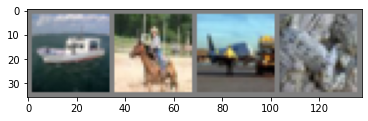

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()
    
image_iter = iter(train_loader)
images, _ = image_iter.next()
imshow(torchvision.utils.make_grid(images[:4]))

In [ ]:
# cuda is used to set up and run CUDA operations. It keeps track of the currently selected GPU, and all CUDA tensors you allocate will by default be created on that device.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = torch.device('cpu')
print(device)

cpu


In [ ]:
class BasicBlock(nn.Module):
    """
    For shallow networks, 
    we use basic Blocks 
    The base block has no dimension compression, 
    so aspect=1
    """
    expansion = 1
    
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        # sequential is, one of the classes that are used to create the PyTorch neural networks without any explicit class.
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            # BatchNorm2d - Use the PyTorch BatchNorm2d Module to accelerate Deep Network training by reducing internal covariate shift
            nn.BatchNorm2d(out_channels),
            # The activation function is a class in PyTorch that helps to convert linear function to non-linear and converts complex data into simple functions so that it can be solved easily.
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        # If the input and output dimensions are unequal, 
        #a 1x1 convolutional layer is used to change the dimensions
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels),
            )
            
    def forward(self, x):
        out = self.features(x)
        out += self.shortcut(x)
        out = torch.relu(out)
        return out

Need to review what this code does and how it is relating to ResNet and if it is required

In [ ]:
# Test
basic_block = BasicBlock(64, 128)
print(basic_block)
x = torch.randn(2, 64, 32, 32)
y = basic_block(x)
print(y.shape)

BasicBlock(
  (features): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (shortcut): Sequential(
    (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
torch.Size([2, 128, 32, 32])


In [ ]:
class Bottleneck(nn.Module):
    """
    For deep networks, we use BattleNeck, 
    which in the paper suggests that it has approximate computational complexity 
    but saves a lot of resources zip_channels: The compressed dimension, 
    the last output dimension is expansion * zip_channels
    """
    expansion = 4

    def __init__(self, in_channels, zip_channels, stride=1):
        super(Bottleneck, self).__init__()
        out_channels = self.expansion * zip_channels
        # sequential is, one of the classes that are used to create the PyTorch neural networks without any explicit class.
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, zip_channels, kernel_size=1, bias=False),
             # BatchNorm2d - Use the PyTorch BatchNorm2d Module to accelerate Deep Network training by reducing internal covariate shift
            nn.BatchNorm2d(zip_channels),
            # The activation function is a class in PyTorch that helps to convert linear function to non-linear and converts complex data into simple functions so that it can be solved easily.
            nn.ReLU(inplace=True),
            nn.Conv2d(zip_channels, zip_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(zip_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(zip_channels, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
            
    def forward(self, x):
        out = self.features(x)
        out += self.shortcut(x)
        out = torch.relu(out)
        return out

Need to do same as above for what we did for basic block

In [ ]:
# Test
bottleneck = Bottleneck(256, 128)
print(bottleneck)
x = torch.randn(2, 256, 32, 32)
y = bottleneck(x)
print(y.shape)

Bottleneck(
  (features): Sequential(
    (0): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (shortcut): Sequential(
    (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
torch.Size([2, 512, 32, 32])


In [ ]:
class ResNet(nn.Module):
    """
    Different ResNet architectures are uniform one-layer feature extraction, 
    four layers of residuals, 
    the difference is the depth of each layer of residuals. 
    For cifar10, the feature map size changes as follows: 
    (32, 32, 3) -> 
    [Conv2d] -> 
    (32, 32, 64) -> 
    [Res1] -> 
    (32, 32, 64) -> 
    [Res2] -> 
    (16, 16, 128) -> 
    [Res3] -> 
    (8, 8, 256) ->
    [Res4] -> 
    (4, 4, 512) -> 
    [AvgPool] -> 
    (1, 1, 512) -> 
    [Reshape] -> 
    (512) -> 
    [Linear] -> 
    (10)
    """
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
       # nettest = resnet50(pretrained=True, feature_extract = True)

        # Cifar10 after the above structure, 
        # the characteristic map size here is 4 x 4 x 512 x expansion
        # So here is an average pooling of 4 x 4
        self.avg_pool = nn.AvgPool2d(kernel_size=4)
        self.classifer = nn.Linear(512 * block.expansion, num_classes)


        
    def _make_layer(self, block, out_channels, num_blocks, stride):
        # The first block is downsampled
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            # If it is a Crossbow Block, 
            # the dimensions entered in each layer need to be compressed, 
            # and the dimensions need to be compressed and then increased
            # Therefore, 
            # the input dimension of each layer must also change
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.features(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.classifer(out)
        return out

4. Explain the architecture and why it is most sutiable to use

In [ ]:
def ResNet18():
    return ResNet(BasicBlock, [2,2,2,2])

def ResNet50():
    return ResNet(Bottleneck, [3,4,6,3])

In [ ]:
from torchvision.models.resnet import resnet50
from torchvision import models
net = ResNet18().to(device)
print(net)
if device == 'cuda':
    net = nn.DataParallel(net)
    # Performance can be improved when the computational graph does not change 
    # (the model does not change each time the input shape is the same), 
    # and vice versa
    torch.backends.cudnn.benchmark = True



ResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (features): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (features): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
# Test
x = torch.randn(2, 3, 32, 32).to(device)
y = net(x)

print(y.shape)

torch.Size([2, 10])


In [ ]:
lr = 1e-1
momentum = 0.9
weight_decay = 5e-4

# CrossEntropyLoss class torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean', label_smoothing=0.0). This criterion computes the cross entropy loss between input and target. 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, threshold=0.1, patience=3, verbose=True)

In [ ]:
# Training
def train(epoch):
    print('\nEpoch: %d' % (epoch))
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # it is accumulated in buffers while building a neural network
        outputs = net(inputs)
        loss = criterion(outputs, targets) # This criterion computes the cross entropy loss between input and target.
        loss.backward() # The backward () method is used to compute the gradient during the backward pass in a neural network.
        optimizer.step() # it performs a single optimization step (parameter update).

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.6f |  Acc: %.3f%% (%d/%d)' %
                  (epoch + 1, batch_idx + 1, train_loss, 100.*correct/total, correct, total))
    return train_loss

    for i, data in enumerate(train_loader, 0):
        train_loss =+ loss.item() * images.size(0)

    loss.append(loss_train.item())

5. Explain how the train works on the 10 different object cateogires 

In [ ]:
load_model = False
if load_model:
    checkpoint = torch.load('./checkpoint/res18.ckpt')
    net.load_state_dict(checkpoint['net'])
    start_epoch = checkpoint['epoch']
else:
    start_epoch = 0
print('start_epoch: %s' % start_epoch)

start_epoch: 0


In [ ]:
import time
for epoch in range(start_epoch, 50):
    loss = train(epoch)
    print('Total loss: %.6f' % loss)
    start_epoch = epoch
    scheduler.step(loss, epoch=epoch)

t0 = time.time()
train(epoch)
print('{} seconds'.format(time.time() - t0))


import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(loss,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

    



Epoch: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,   100] loss: 282.585637 |  Acc: 10.695% (1369/12800)
[1,   200] loss: 503.138676 |  Acc: 13.539% (3466/25600)
[1,   300] loss: 699.202826 |  Acc: 17.596% (6757/38400)
Total loss: 862.170314


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:920: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


In [ ]:


save_model = True
if save_model:
    state = {
        'net': net.state_dict(),
        'epoch': epoch,
    }
    os.makedirs('checkpoint', exist_ok=True) # for create directory if not exists
    torch.save(state, './checkpoint/res18.ckpt') # to save the data into directory



In [ ]:
from torchvision.models.resnet import resnet50
from torchvision import models
nettest = resnet50(pretrained=True)
print(nettest)
if device == 'cuda':
    nettest = nn.DataParallel(nettest)
    # Performance can be improved when the computational graph does not change 
    # (the model does not change each time the input shape is the same), 
    # and vice versa
    torch.backends.cudnn.benchmark = True

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


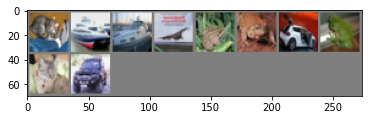

GroundTruth:    cat  ship  ship plane
Predicted:    cat plane  ship   cat
Accuracy of the network on the 10000 test images: 37 %
Accuracy of plane : 48 %
Accuracy of   car : 69 %
Accuracy of  bird :  8 %
Accuracy of   cat : 24 %
Accuracy of  deer : 20 %
Accuracy of   dog : 14 %
Accuracy of  frog : 56 %
Accuracy of horse : 48 %
Accuracy of  ship : 43 %
Accuracy of truck : 36 %


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images[:10]
labels = labels[:10]
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images.to(device))
_, predicted = torch.max(outputs.cpu(), 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    

image_iter = iter(test_loader)
images, _ = image_iter.next()
imshow(torchvision.utils.make_grid(images[:10]))

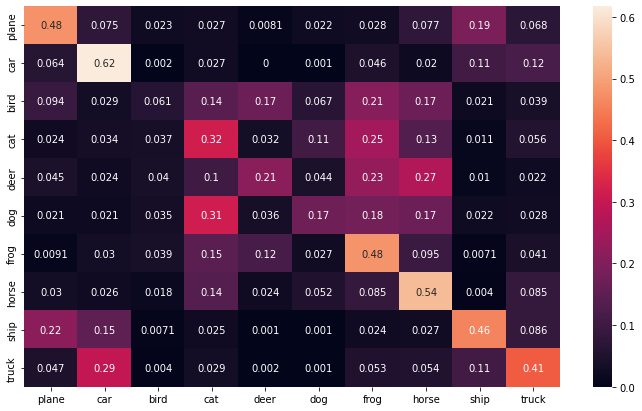

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in dataiter:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

6. Explain the test method, if we used pre-trained model and why we did that

7. Need to look at the performance metrics, can see accuracy is included, training loss, as well as some sample from the classes, need to add confusion matrix